# <font color=red>Programming For Data Analytics Project</font>

## GMIT GRAD. DIP. DATA ANALYTICS


### <font color=blue>PROBLEM STATEMENT</font>

Fictitious Pharmaceutical Company ‘Ollopa Pharmaceuticals’ manufactures the Active Pharmaceutical Ingredient (API) for its small molecule blockbuster drug ‘Asclepius’ by organic synthesis in a processing plant. The Manufacturing Science Group have been asked to optimise the production process to increase the yield of the active ingredient. The theoretical yield is between 28 and 32Kg per batch based on standard inputs and management would like to see yields increased to approach the max theoretical yield of 32Kgs. The Manufacturing Science Group have identified 4 Process Variables which they would like to investigate to see if there is any correlation between them and the yield.

### <font color=blue>1.CREATE THE VARIABLES</font>

**Critical Quality Attributes, (CQA's)**

|Yield    | Reaction Temp |Pre-Crystallisation pH|Mother Liquor Loss|Solvent Exchange IPC Result|
|:-------:|:-----------------:|:--------------------:|:-----------------------:|:-------------------------:|
| 28-32Kg | 15-25$^o$C | pH = 6.5-7.5 | 0-50g| 0-0.5% |

#### <font color=brown>**Variables Explained**</font>

> **Yield:** The weight of API achieved at the end of the process<br> *We hope to determine the effects of the following variables on its magnitude*

>**Reaction Temp:** Temp the reaction reaches (it is an exothermic reaction)<br>
**pH:** The pH of the batch before it is crystallised<br>
**Mother Liquor Loss:** The product losses in the filtrate<br>

The Critical Quality Attributes are the parameters, defined by quality and agreed with the regulatory authorities, which must be adhered to in order for the active ingredient to meet predefined quality standards. A manufacturing process which deviates from these CQA's could potentially be scrapped or re-worked. Such events are outside the scope of this study so the dataset investigated in this study will be within the parameters of the above CQA's

For the purposes of creating a dataset we will investigate 100 data points of each CQA (or variable) i.e. 100 batches will be studied each of which will have data for each variable.

The effect or contribution (if any) of these variables to the batch yield will be investigated.




In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#number of observations

size = 100 

#List of variables

BatchNumber = np.arange(1,101)

Yield = np.round(np.random.normal(loc=30, scale=0.25, size=size),2)

RxnTemp = np.round(np.random.normal(loc=20, scale=0.5, size=size),2)

pH = np.round(np.random.normal(loc=7.0, scale=0.25, size=size),2)

MLLoss = np.round(np.random.normal(loc=50, scale=0.1, size=size),2)

IPC = np.round(np.random.normal(loc=0.25, scale=0.025, size=size),2)



In [120]:
#Output the Data as NUMPY arrays
print(('Batch #=', BatchNumber, 'Yield =', Yield), ('pH ='), pH), ('Reaction Temp(C) =', RxnTemp), ('Mother Liquor Loss =', MLLoss), ('IPC Result % =', IPC)

('Batch #=', array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]), 'Yield =', array([30.23, 29.65, 29.9 , 30.48, 29.46, 30.06, 30.31, 29.91, 29.97,
       30.33, 30.06, 29.87, 30.22, 29.78, 29.81, 30.19, 30.38, 30.15,
       30.1 , 29.93, 30.1 , 29.93, 29.83, 30.  , 29.94, 29.48, 29.7 ,
       29.77, 30.41, 30.03, 29.61, 30.05, 30.45, 29.91, 30.03, 30.  ,
       30.11, 30.11, 30.01, 29.66, 30.18, 29.86, 30.02, 30.  , 29.97,
       30.02, 30.38, 30.29, 29.8 , 30.12, 29.9 , 29.53, 30.11, 30.24

(None,
 ('Reaction Temp(C) =',
  array([20.11, 19.78, 20.7 , 20.78, 20.87, 18.9 , 19.58, 20.36, 20.76,
         19.23, 19.51, 19.5 , 20.03, 20.28, 19.68, 20.11, 20.79, 19.57,
         20.18, 19.91, 19.89, 19.15, 19.65, 20.57, 19.8 , 19.95, 20.58,
         19.55, 20.63, 20.3 , 19.93, 19.9 , 19.65, 20.09, 19.96, 19.78,
         20.02, 19.13, 20.26, 20.22, 19.67, 19.61, 19.17, 19.64, 20.48,
         19.38, 20.54, 20.16, 19.86, 19.93, 20.14, 20.86, 20.71, 20.16,
         20.86, 20.05, 20.7 , 19.63, 19.2 , 19.52, 19.71, 20.76, 19.92,
         20.57, 20.3 , 19.1 , 19.85, 19.97, 19.63, 20.07, 20.03, 20.15,
         20.22, 19.43, 19.73, 20.31, 20.94, 19.89, 20.04, 20.37, 19.13,
         20.98, 19.42, 19.23, 20.66, 19.69, 19.62, 20.54, 19.82, 19.58,
         19.46, 19.46, 19.96, 20.33, 20.39, 19.88, 20.25, 19.51, 20.47,
         19.91])),
 ('Mother Liquor Loss =',
  array([49.7 , 49.83, 49.9 , 50.16, 49.95, 49.93, 50.19, 49.9 , 49.89,
         49.88, 50.  , 49.93, 49.99, 50.06, 50.02, 49.83, 49

### <font color=blue>2. CREATE A DATAFRAME OF ALL VARIABLES</font>

**Each of the 4 numpy arrays will now be concatenated to create 1 dataframe**

[1][Column names](https://docs.python.org/3.4/tutorial/datastructures.html#dictionaries)

In [131]:

columns = {"Batch #": BatchNumber, "Yield(kg)": Yield, "pH": pH, "Reaction Temp(C)": RxnTemp, "Mother Liquor Loss(g)": MLLoss, "IPC Result(%)": IPC} #Add labels to the columns

Batchdf = pd.DataFrame(columns,
                  columns=["Batch #", "Yield(kg)", "pH", "Reaction Temp(C)", "Mother Liquor Loss(g)","IPC Result(%)"]) #create the dataframe

#Batchdf.set_index('Batch Number')
Batchdf

,Batch #,Yield(kg),pH,Reaction Temp(C),Mother Liquor Loss(g),IPC Result(%)
0,1,30.23,6.87,20.11,49.70,0.25
1,2,29.65,7.21,19.78,49.83,0.28
2,3,29.90,7.05,20.70,49.90,0.26
3,4,30.48,7.04,20.78,50.16,0.30
4,5,29.46,7.17,20.87,49.95,0.25
5,6,30.06,6.88,18.90,49.93,0.27
6,7,30.31,7.54,19.58,50.19,0.26
7,8,29.91,7.00,20.36,49.90,0.23
8,9,29.97,6.65,20.76,49.89,0.28
9,10,30.33,7.00,19.23,49.88,0.27


<font color=blue>**We have now created an artificial DataSet known as Batchdf**</font>

The dataset will now be exported as a csv file. This will ensure that a new dataset will not be created everytime the notebook is ran

[2][Pandas.DataFrame.to_CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [137]:
Batchdf.to_csv('Batch.csv') #Exports and saves the Data Set as a csv file called 'Batch.csv'


'Batch' has been renamed BatchCSV in local folder in order to preserve the original Data Set created

In [138]:
#BatchCSV will now be imported back from local folder as a Pandas Dataframe
Batches = pd.read_csv("BatchCSV.csv")

In [139]:
Batches #Outputs the saved original DataSet: BatchCSV

,Batch #,Yield(kg),pH,Reaction Temp(C),Mother Liquor Loss(g),IPC Result(%)
0,1,30.23,6.87,20.11,49.70,0.25
1,2,29.65,7.21,19.78,49.83,0.28
2,3,29.90,7.05,20.70,49.90,0.26
3,4,30.48,7.04,20.78,50.16,0.30
4,5,29.46,7.17,20.87,49.95,0.25
5,6,30.06,6.88,18.90,49.93,0.27
6,7,30.31,7.54,19.58,50.19,0.26
7,8,29.91,7.00,20.36,49.90,0.23
8,9,29.97,6.65,20.76,49.89,0.28
9,10,30.33,7.00,19.23,49.88,0.27


### <font color=blue> 2.Create a Scatterplot Matrix of the DataFrame</font>


In [145]:
#[Credit] (https://github.com/spyder-ide/spyder/issues/7312)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Workaround to remove 'FutureWarnings' message which appears to be a bug. 

The following function *pairplot* using the Seaborn package, creates a scatterplot matrix of variables and includes a density estimate (in the diagonal axis). It's a useful package to visualise data with multiple variables. [Python for Data Analysis; McKinney, W.; O'Reilly; p.282]

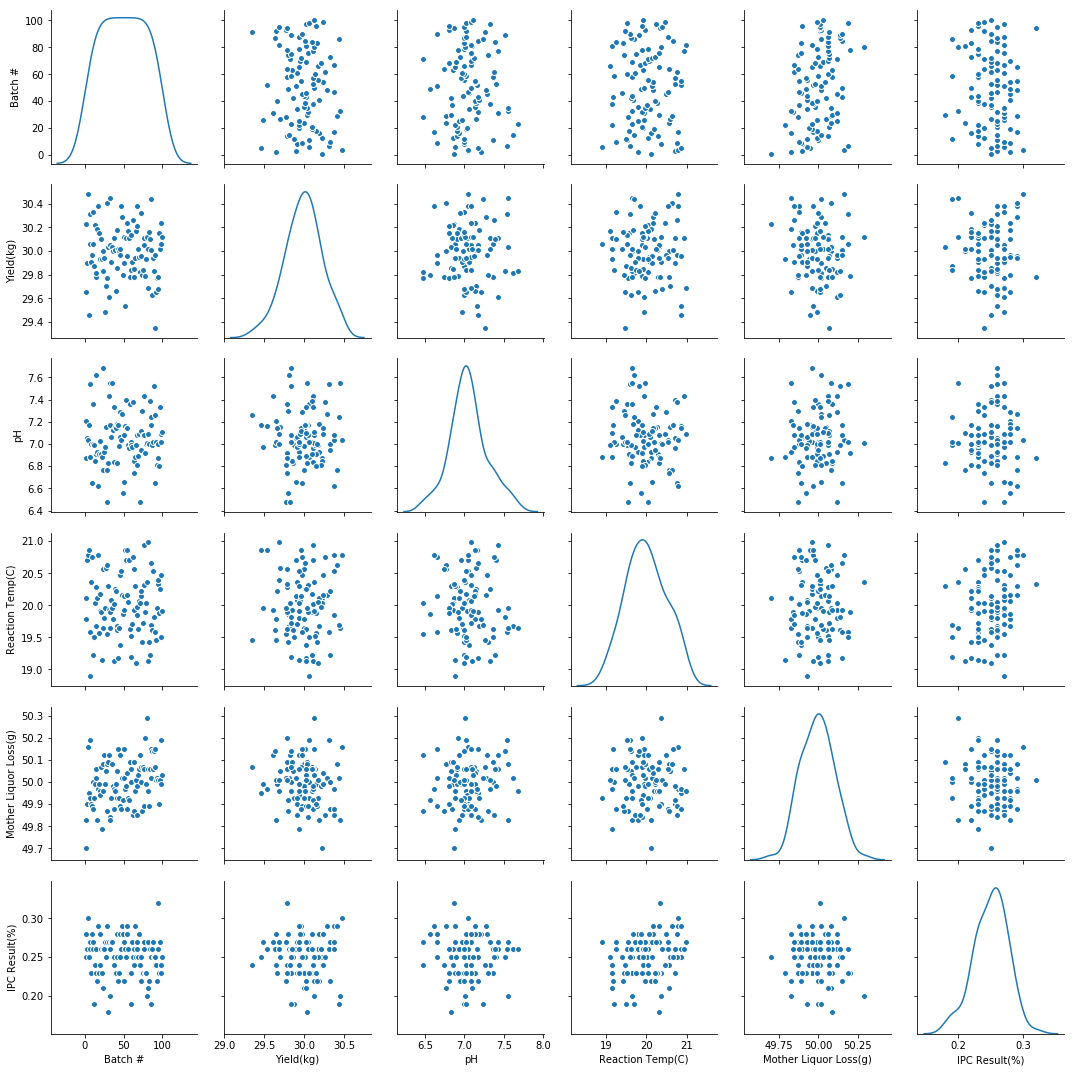

In [146]:
sns.pairplot(Batches, diag_kind='kde', plot_kws={'alpha':1.0, });#scatterplots and kde's of all variables
